<a href="https://colab.research.google.com/github/Hossein-Fallahi/AML-survival-analysis/blob/main/AML_ResistantResponse16062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# doing machine leraning in AML data- look for possible model for metastasis

In [ ]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('aml-rppa.csv')
df.head(7)

Saving aml-rppa.csv to aml-rppa (4).csv


,AMLID,TREATED,Source,Age_at_Dx,SEX,RACE,ZUBROD.S,Dx,INFECTION,PRIOR_MAL,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,AML0001,New,BMA,52.539357,F,White,0.0,AML,No,NO,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,AML0004,New,BMA,55.523614,F,White,1.0,AML,Yes,NO,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
2,AML0005,New,PB,57.494867,M,White,1.0,AML,No,YES,...,-4.238267,-7.520137,-7.979591,-4.244894,-4.567999,-4.026042,-9.144394,-10.443905,-4.719249,YES
3,AML0007,New,PB,71.641342,F,White,1.0,AML,Yes,NO,...,-5.246272,-7.281190,-6.934388,-4.317735,-4.325158,-3.202140,-9.899066,-5.475831,-4.554113,NO
4,AML0008,New,PB,74.663929,F,White,1.0,AML,No,NO,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
5,AML0009,New,PB,42.622861,M,White,1.0,AML,No,NO,...,-4.008797,-7.909570,-11.384413,-4.675822,-4.489940,-3.347111,-9.403248,-12.894258,-4.650980,NO
6,AML0010,New,BMA,74.119097,M,White,3.0,AML,No,NO,...,-4.665217,-7.671745,-9.441247,-5.525199,-4.064684,-3.412890,-10.998080,-13.094365,-4.373750,NO


In [ ]:
 #count the number of rows and columns
df.shape 

(256, 99)

In [ ]:
# drop all non essential columns for our analysis
df.drop(df.columns[[0, 1, 2,6,7,14]], axis = 1, inplace = True)
df.drop(df.columns[[0,1,2,4,5,6,7]], axis = 1, inplace = True)
df.drop(df.columns[[0,1,2]], axis = 1, inplace = True)

df

,AHD,AHD.type,FAB,CG.group,CatCyto,D835,ITD,EFS,Event,Overall_Sur,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,48,MPD/MDS,NaN,UNF,Misc,NEG,NEG,5.000000,Yes,5.000000,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,0,No,M0,UNF,Misc,ND,ND,7.714286,Yes,7.710000,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
2,0,No,M2,UNF,Misc,NEG,NEG,102.714286,Yes,102.710000,...,-4.238267,-7.520137,-7.979591,-4.244894,-4.567999,-4.026042,-9.144394,-10.443905,-4.719249,YES
3,100,MDS,M0,UNF,8,NEG,NEG,13.000000,Yes,14.710000,...,-5.246272,-7.281190,-6.934388,-4.317735,-4.325158,-3.202140,-9.899066,-5.475831,-4.554113,NO
4,36,MDS,M4,UNF,Misc,NEG,NEG,31.571429,Yes,31.570000,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,36,AML/MDS,M0,UNF,-7,ND,ND,NaN,NaN,7.857143,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,YES
252,0,No,M4,INT,DIP,NEG,NEG,NaN,UNK,3.860000,...,-5.146754,-8.087802,-12.112380,-6.205876,-4.561522,-3.291190,-11.262754,-13.073754,-4.091867,NO
253,4,abnormal counts,M6,ND,Not done,NEG,POS,NaN,NaN,257.860000,...,-5.632380,-8.089857,-10.622822,-5.584569,-4.763133,-2.731504,-9.333040,-12.003428,-4.055543,NO
254,1,MDS,RAEBT,ND,Not done,NEG,NEG,37.571429,Yes,81.000000,...,-4.529394,-9.169434,-9.026498,-4.532651,-3.885517,-2.343892,-7.745868,-9.473295,-3.930451,NO


In [ ]:
df.drop(df.columns[[0,1,2,3,4,5,6]], axis = 1, inplace = True)
df

,EFS,Event,Overall_Sur,VITAL_STATUS,Response,CR_duration,RELAPSE,ALBUMIN,BILIRUBIN,CREATININE,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,5.000000,Yes,5.000000,D,FAIL,NaN,NaN,3.2,0.2,0.9,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,7.714286,Yes,7.710000,D,RESISTANT,NaN,NaN,2.7,0.4,0.7,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
2,102.714286,Yes,102.710000,D,CR,98.428571,False,3.9,0.4,1.1,...,-4.238267,-7.520137,-7.979591,-4.244894,-4.567999,-4.026042,-9.144394,-10.443905,-4.719249,YES
3,13.000000,Yes,14.710000,D,CR,7.428571,True,2.7,0.6,0.9,...,-5.246272,-7.281190,-6.934388,-4.317735,-4.325158,-3.202140,-9.899066,-5.475831,-4.554113,NO
4,31.571429,Yes,31.570000,D,RESISTANT,NaN,NaN,3.7,0.2,1.1,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,NaN,7.857143,A,RESISTANT,NaN,NaN,3.8,1.3,1.0,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,YES
252,NaN,UNK,3.860000,D,NaN,NaN,NaN,4.6,0.4,0.9,...,-5.146754,-8.087802,-12.112380,-6.205876,-4.561522,-3.291190,-11.262754,-13.073754,-4.091867,NO
253,NaN,NaN,257.860000,A,CR,250.142857,False,3.9,1,0.8,...,-5.632380,-8.089857,-10.622822,-5.584569,-4.763133,-2.731504,-9.333040,-12.003428,-4.055543,NO
254,37.571429,Yes,81.000000,D,CR,29.571429,True,3.1,0.6,0.8,...,-4.529394,-9.169434,-9.026498,-4.532651,-3.885517,-2.343892,-7.745868,-9.473295,-3.930451,NO


In [ ]:
df.drop(df.columns[[1,3,5,6]], axis = 1, inplace = True)
df

,EFS,Overall_Sur,Response,ALBUMIN,BILIRUBIN,CREATININE,FIBRINOGEN,CD10,LDH,CD13,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,5.000000,5.000000,FAIL,3.2,0.2,0.9,390.0,16.0,694.0,99.0,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,7.714286,7.710000,RESISTANT,2.7,0.4,0.7,565.0,4.2,640.0,99.6,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
2,102.714286,102.710000,CR,3.9,0.4,1.1,701.0,1.6,1497.0,59.0,...,-4.238267,-7.520137,-7.979591,-4.244894,-4.567999,-4.026042,-9.144394,-10.443905,-4.719249,YES
3,13.000000,14.710000,CR,2.7,0.6,0.9,580.0,8.0,7362.0,95.0,...,-5.246272,-7.281190,-6.934388,-4.317735,-4.325158,-3.202140,-9.899066,-5.475831,-4.554113,NO
4,31.571429,31.570000,RESISTANT,3.7,0.2,1.1,241.0,14.0,414.0,87.0,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,NaN,7.857143,RESISTANT,3.8,1.3,1.0,NaN,1.1,1731.0,92.5,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,YES
252,NaN,3.860000,NaN,4.6,0.4,0.9,510.0,7.0,1718.0,91.0,...,-5.146754,-8.087802,-12.112380,-6.205876,-4.561522,-3.291190,-11.262754,-13.073754,-4.091867,NO
253,NaN,257.860000,CR,3.9,1,0.8,487.0,2.7,1327.0,91.3,...,-5.632380,-8.089857,-10.622822,-5.584569,-4.763133,-2.731504,-9.333040,-12.003428,-4.055543,NO
254,37.571429,81.000000,CR,3.1,0.6,0.8,489.0,5.0,440.0,85.0,...,-4.529394,-9.169434,-9.026498,-4.532651,-3.885517,-2.343892,-7.745868,-9.473295,-3.930451,NO


In [ ]:
#count of the number of empty values (e.g. NaN, NAN, na) in each column
df.isna().sum()

EFS            95
Overall_Sur     0
Response       43
ALBUMIN         5
BILIRUBIN       7
               ..
TP27            0
TP38.p          0
TP53            0
XIAP            0
class           0
Length: 72, dtype: int64

In [ ]:
df.drop(df.columns[[0]], axis = 1, inplace = True)
df

,Overall_Sur,Response,ALBUMIN,BILIRUBIN,CREATININE,FIBRINOGEN,CD10,LDH,CD13,CD19,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,5.000000,FAIL,3.2,0.2,0.9,390.0,16.0,694.0,99.0,0.0,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,7.710000,RESISTANT,2.7,0.4,0.7,565.0,4.2,640.0,99.6,1.0,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
2,102.710000,CR,3.9,0.4,1.1,701.0,1.6,1497.0,59.0,42.0,...,-4.238267,-7.520137,-7.979591,-4.244894,-4.567999,-4.026042,-9.144394,-10.443905,-4.719249,YES
3,14.710000,CR,2.7,0.6,0.9,580.0,8.0,7362.0,95.0,1.0,...,-5.246272,-7.281190,-6.934388,-4.317735,-4.325158,-3.202140,-9.899066,-5.475831,-4.554113,NO
4,31.570000,RESISTANT,3.7,0.2,1.1,241.0,14.0,414.0,87.0,1.0,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,7.857143,RESISTANT,3.8,1.3,1.0,NaN,1.1,1731.0,92.5,0.2,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,YES
252,3.860000,NaN,4.6,0.4,0.9,510.0,7.0,1718.0,91.0,3.0,...,-5.146754,-8.087802,-12.112380,-6.205876,-4.561522,-3.291190,-11.262754,-13.073754,-4.091867,NO
253,257.860000,CR,3.9,1,0.8,487.0,2.7,1327.0,91.3,5.9,...,-5.632380,-8.089857,-10.622822,-5.584569,-4.763133,-2.731504,-9.333040,-12.003428,-4.055543,NO
254,81.000000,CR,3.1,0.6,0.8,489.0,5.0,440.0,85.0,8.0,...,-4.529394,-9.169434,-9.026498,-4.532651,-3.885517,-2.343892,-7.745868,-9.473295,-3.930451,NO


In [ ]:
df.drop(df.columns[[0]], axis = 1, inplace = True)


In [ ]:
df

,Response,ALBUMIN,BILIRUBIN,CREATININE,FIBRINOGEN,CD10,LDH,CD13,CD19,CD20,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,FAIL,3.2,0.2,0.9,390.0,16.0,694.0,99.0,0.0,0.0,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,RESISTANT,2.7,0.4,0.7,565.0,4.2,640.0,99.6,1.0,0.7,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
2,CR,3.9,0.4,1.1,701.0,1.6,1497.0,59.0,42.0,0.7,...,-4.238267,-7.520137,-7.979591,-4.244894,-4.567999,-4.026042,-9.144394,-10.443905,-4.719249,YES
3,CR,2.7,0.6,0.9,580.0,8.0,7362.0,95.0,1.0,1.0,...,-5.246272,-7.281190,-6.934388,-4.317735,-4.325158,-3.202140,-9.899066,-5.475831,-4.554113,NO
4,RESISTANT,3.7,0.2,1.1,241.0,14.0,414.0,87.0,1.0,1.0,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,RESISTANT,3.8,1.3,1.0,NaN,1.1,1731.0,92.5,0.2,0.1,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,YES
252,NaN,4.6,0.4,0.9,510.0,7.0,1718.0,91.0,3.0,4.0,...,-5.146754,-8.087802,-12.112380,-6.205876,-4.561522,-3.291190,-11.262754,-13.073754,-4.091867,NO
253,CR,3.9,1,0.8,487.0,2.7,1327.0,91.3,5.9,1.8,...,-5.632380,-8.089857,-10.622822,-5.584569,-4.763133,-2.731504,-9.333040,-12.003428,-4.055543,NO
254,CR,3.1,0.6,0.8,489.0,5.0,440.0,85.0,8.0,2.0,...,-4.529394,-9.169434,-9.026498,-4.532651,-3.885517,-2.343892,-7.745868,-9.473295,-3.930451,NO


In [ ]:
#drop the columns with all missing values- I did not drop the NA containg couumns as Response coulmn would be removed
#df = df.dropna(axis=1)

In [ ]:
#get the new coumnt of the data
df.shape

(256, 70)

In [ ]:
#list(df.columns) # get the list of all coulm headers
#get the count of CR or FAIL for the response coulmn
df['Response'].value_counts()


CR           128
RESISTANT     66
FAIL          19
Name: Response, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


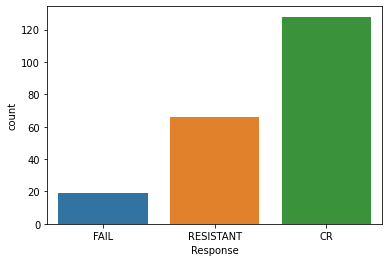

In [ ]:
# visualize the counts
sns.countplot(df['Response'], label = 'count')

In [ ]:
#look at the data type to see whcih coulmn need to be transformed (encoded)
df.dtypes

Response       object
ALBUMIN       float64
BILIRUBIN      object
CREATININE    float64
FIBRINOGEN    float64
               ...   
TP27          float64
TP38.p        float64
TP53          float64
XIAP          float64
class          object
Length: 70, dtype: object

In [ ]:
#get the column index for "response"
df.columns.get_loc("Response")
df.iloc[:,0].values

array(['FAIL', 'RESISTANT', 'CR', 'CR', 'RESISTANT', 'CR', nan, 'CR',
       'CR', 'CR', 'CR', 'RESISTANT', 'RESISTANT', nan, 'CR', 'CR', 'CR',
       'CR', 'CR', 'CR', 'CR', 'RESISTANT', 'RESISTANT', 'RESISTANT', nan,
       'RESISTANT', 'CR', 'CR', 'CR', nan, 'RESISTANT', 'RESISTANT', 'CR',
       'CR', nan, 'RESISTANT', 'CR', nan, nan, nan, 'CR', 'CR', 'CR',
       'RESISTANT', 'RESISTANT', 'RESISTANT', nan, 'CR', 'RESISTANT',
       'CR', 'FAIL', nan, 'RESISTANT', 'CR', 'FAIL', 'FAIL', 'RESISTANT',
       nan, 'RESISTANT', 'CR', nan, 'CR', 'CR', nan, 'CR', 'CR', nan, nan,
       'RESISTANT', nan, 'CR', 'CR', nan, 'FAIL', 'FAIL', 'RESISTANT',
       'RESISTANT', 'CR', 'RESISTANT', 'FAIL', 'CR', 'CR', 'FAIL', 'CR',
       'RESISTANT', 'RESISTANT', 'CR', 'RESISTANT', 'RESISTANT', 'FAIL',
       'CR', 'RESISTANT', 'FAIL', 'CR', 'RESISTANT', 'CR', 'CR',
       'RESISTANT', 'CR', 'RESISTANT', 'RESISTANT', 'CR', nan, nan, 'CR',
       nan, 'CR', 'CR', 'RESISTANT', 'CR', 'CR', nan, 'CR', '

In [ ]:
# encode the categorical datavalues
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,0] = labelencoder_Y.fit_transform(df.iloc[:,0].values)
df.iloc[:,0]
df = df[df.Response != 0]


In [ ]:
df

,Response,ALBUMIN,BILIRUBIN,CREATININE,FIBRINOGEN,CD10,LDH,CD13,CD19,CD20,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,1,3.2,0.2,0.9,390.0,16.0,694.0,99.0,0.0,0.0,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,2,2.7,0.4,0.7,565.0,4.2,640.0,99.6,1.0,0.7,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
4,2,3.7,0.2,1.1,241.0,14.0,414.0,87.0,1.0,1.0,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
6,3,3.4,1,1.7,582.0,1.5,6376.0,93.2,0.0,0.1,...,-4.665217,-7.671745,-9.441247,-5.525199,-4.064684,-3.412890,-10.998080,-13.094365,-4.373750,NO
11,2,3.5,0.8,1.8,617.0,4.8,2285.0,78.7,0.4,0.4,...,-4.657113,-8.027363,-8.479690,-5.047656,-4.596756,-3.462535,-9.918833,-13.531833,-4.350270,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3,3.8,0.6,1.9,472.0,1.9,1975.0,98.9,0.3,0.1,...,-5.227070,-8.270818,-12.307415,-5.283564,-4.453406,-4.029344,-10.409987,-13.022684,-4.877015,NO
250,2,3.6,0.6,3.4,700.0,0.8,3337.0,45.5,1.7,1.2,...,-4.666830,-8.288189,-13.006349,-5.171886,-4.049989,-4.628250,-10.308172,-11.370084,-3.446133,NO
251,2,3.8,1.3,1.0,NaN,1.1,1731.0,92.5,0.2,0.1,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,YES
252,3,4.6,0.4,0.9,510.0,7.0,1718.0,91.0,3.0,4.0,...,-5.146754,-8.087802,-12.112380,-6.205876,-4.561522,-3.291190,-11.262754,-13.073754,-4.091867,NO


In [ ]:
df = df[df.Response != 3]
df

,Response,ALBUMIN,BILIRUBIN,CREATININE,FIBRINOGEN,CD10,LDH,CD13,CD19,CD20,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,1,3.2,0.2,0.9,390.0,16.0,694.0,99.0,0.0,0.00,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,2,2.7,0.4,0.7,565.0,4.2,640.0,99.6,1.0,0.70,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
4,2,3.7,0.2,1.1,241.0,14.0,414.0,87.0,1.0,1.00,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
11,2,3.5,0.8,1.8,617.0,4.8,2285.0,78.7,0.4,0.40,...,-4.657113,-8.027363,-8.479690,-5.047656,-4.596756,-3.462535,-9.918833,-13.531833,-4.350270,NO
12,2,3.2,0.4,1.3,300.0,7.2,944.0,88.8,5.9,0.95,...,-5.305919,-7.517600,-9.776641,-4.713952,-4.121748,-2.992013,-9.549297,-12.243587,-4.001333,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2,3.8,0.2,0.8,689.0,1.8,10.0,99.9,0.2,0.20,...,-4.749793,-7.468660,-8.206032,-4.663995,-3.997370,-3.035100,-10.082538,-10.791316,-3.946058,YES
239,2,3.6,0.6,0.7,564.0,3.8,2045.0,94.6,1.9,1.10,...,-4.864438,-7.569718,-10.824155,-5.273074,-4.009006,-3.677215,-9.563644,-6.926882,-4.308845,YES
250,2,3.6,0.6,3.4,700.0,0.8,3337.0,45.5,1.7,1.20,...,-4.666830,-8.288189,-13.006349,-5.171886,-4.049989,-4.628250,-10.308172,-11.370084,-3.446133,NO
251,2,3.8,1.3,1.0,NaN,1.1,1731.0,92.5,0.2,0.10,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,YES


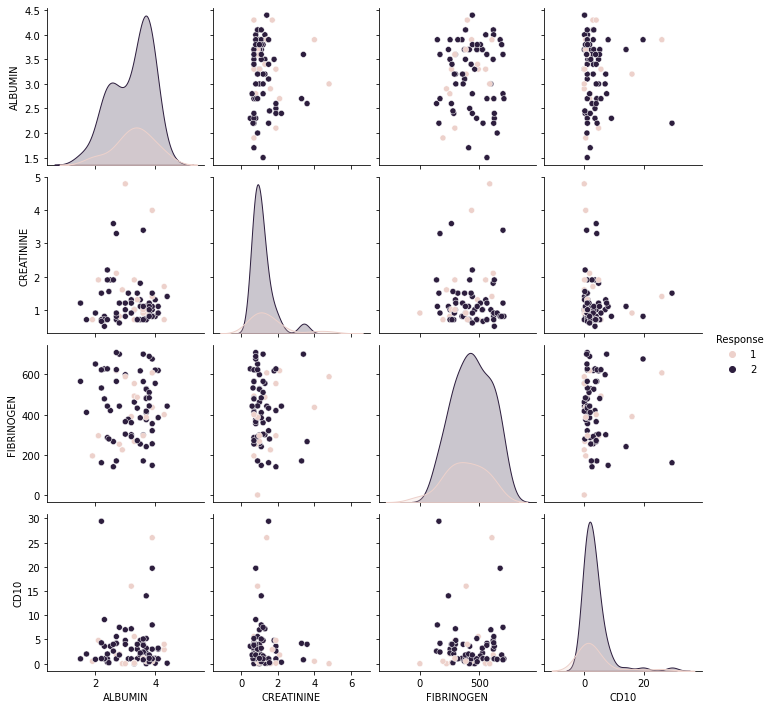

In [ ]:
# creat a pair plot
sns.pairplot(df.iloc[:,0:6], hue ='Response')

In [ ]:
# print the first 5 row of the new dataset
df.head(5)

,Response,ALBUMIN,BILIRUBIN,CREATININE,FIBRINOGEN,CD10,LDH,CD13,CD19,CD20,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,1,3.2,0.2,0.9,390.0,16.0,694.0,99.0,0.0,0.00,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,NO
1,2,2.7,0.4,0.7,565.0,4.2,640.0,99.6,1.0,0.70,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,NO
4,2,3.7,0.2,1.1,241.0,14.0,414.0,87.0,1.0,1.00,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,NO
11,2,3.5,0.8,1.8,617.0,4.8,2285.0,78.7,0.4,0.40,...,-4.657113,-8.027363,-8.479690,-5.047656,-4.596756,-3.462535,-9.918833,-13.531833,-4.350270,NO
12,2,3.2,0.4,1.3,300.0,7.2,944.0,88.8,5.9,0.95,...,-5.305919,-7.517600,-9.776641,-4.713952,-4.121748,-2.992013,-9.549297,-12.243587,-4.001333,NO


In [ ]:
#get the correlation of the coulmns
df.iloc[:,0:12].corr()

,Response,ALBUMIN,CREATININE,FIBRINOGEN,CD10,LDH,CD13,CD19,CD20,CD33,CD34
Response,1.000000,-0.043115,-0.207995,0.152244,-0.012217,-0.207039,0.192679,-0.052892,-0.159835,-0.168435,0.337018
ALBUMIN,-0.043115,1.000000,-0.064077,0.023991,-0.027221,-0.101783,-0.067706,0.080861,0.008072,-0.082328,0.086358
CREATININE,-0.207995,-0.064077,1.000000,0.004780,-0.061076,0.155100,-0.085926,-0.006569,0.078859,0.119853,-0.255598
FIBRINOGEN,0.152244,0.023991,0.004780,1.000000,-0.016273,-0.081329,0.044577,0.145256,0.086652,0.093208,0.134836
CD10,-0.012217,-0.027221,-0.061076,-0.016273,1.000000,-0.079803,0.065084,0.040493,-0.035624,-0.096303,-0.119533
LDH,-0.207039,-0.101783,0.155100,-0.081329,-0.079803,1.000000,0.051252,0.122672,0.040673,0.158992,-0.168705
CD13,0.192679,-0.067706,-0.085926,0.044577,0.065084,0.051252,1.000000,0.057968,-0.099432,-0.214918,0.386664
CD19,-0.052892,0.080861,-0.006569,0.145256,0.040493,0.122672,0.057968,1.000000,0.688753,-0.073939,-0.052953
CD20,-0.159835,0.008072,0.078859,0.086652,-0.035624,0.040673,-0.099432,0.688753,1.000000,0.010476,-0.119313
CD33,-0.168435,-0.082328,0.119853,0.093208,-0.096303,0.158992,-0.214918,-0.073939,0.010476,1.000000,-0.396910


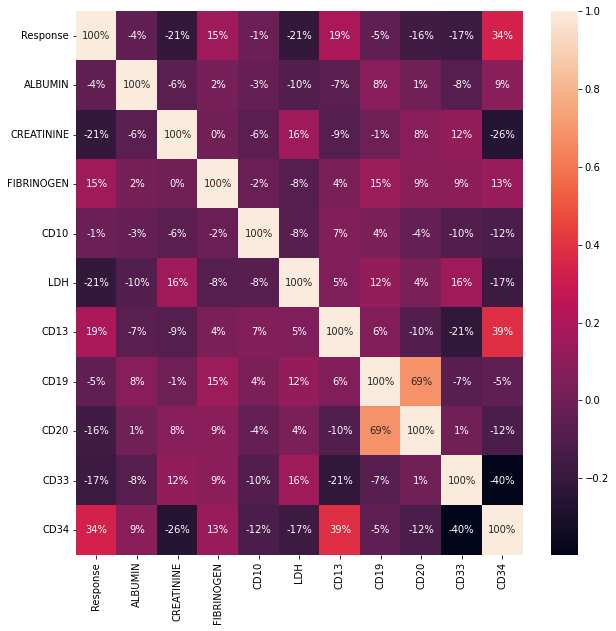

In [ ]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:12].corr(), annot=True, fmt ='.0%')

In [ ]:
df = df.replace(['NO'],'0.0')
df = df.replace(['YES'],'1.0')
#remove column with NaN values- 
df = df.dropna(axis=1)
df


,Response,CREATININE,CD10,CD13,CD33,CD34,WBC,HGB,PB_Blast,ACTB,...,STAT3.p705,STAT3.p727,STAT5.p431,STAT6.p,SURVIVIN,TP27,TP38.p,TP53,XIAP,class
0,1,0.9,16.0,99.0,100.0,0.0,36,9.80,0.0,-1.309851,...,-4.938010,-8.075947,-9.094408,-4.402807,-3.291882,-3.183747,-7.098431,-11.046885,-3.445532,0.0
1,2,0.7,4.2,99.6,99.5,99.1,8.5,9.60,0.0,-2.481441,...,-1.632253,-6.914497,-9.665049,-4.884940,-4.650270,-3.647246,-9.880434,-9.022252,-4.437324,0.0
4,2,1.1,14.0,87.0,40.0,88.0,9.1,10.80,6.0,-2.104931,...,-5.145056,-7.687817,-10.170684,-5.550804,-4.444733,-3.050764,-11.579181,-12.324393,-4.361910,0.0
11,2,1.8,4.8,78.7,89.4,76.1,18.3,9.60,19.0,-0.577825,...,-4.657113,-8.027363,-8.479690,-5.047656,-4.596756,-3.462535,-9.918833,-13.531833,-4.350270,0.0
12,2,1.3,7.2,88.8,74.1,78.0,14.1,10.55,7.5,-2.092537,...,-5.305919,-7.517600,-9.776641,-4.713952,-4.121748,-2.992013,-9.549297,-12.243587,-4.001333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2,0.8,1.8,99.9,95.5,85.9,120.7,8.70,77.0,-2.976970,...,-4.749793,-7.468660,-8.206032,-4.663995,-3.997370,-3.035100,-10.082538,-10.791316,-3.946058,1.0
239,2,0.7,3.8,94.6,97.2,77.6,6.7,9.10,8.0,-1.910078,...,-4.864438,-7.569718,-10.824155,-5.273074,-4.009006,-3.677215,-9.563644,-6.926882,-4.308845,1.0
250,2,3.4,0.8,45.5,97.7,1.4,16,9.30,21.0,-2.486884,...,-4.666830,-8.288189,-13.006349,-5.171886,-4.049989,-4.628250,-10.308172,-11.370084,-3.446133,0.0
251,2,1.0,1.1,92.5,93.8,94.4,14.5,8.10,71.0,-3.192171,...,-4.030680,-8.492540,-8.933280,-5.112411,-4.033425,-3.162312,-11.423315,-10.191447,-3.062291,1.0


In [ ]:
#split the dataset into independent (X) and dependet (Y)
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

#type(X) it is an array

In [ ]:
#split 75% training and test 25%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size = 0.25, random_state = 0)

In [ ]:
# Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#creat a few models with a function
def models (X_train, Y_train):

  #logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state =0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10 , criterion= 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #print the model accuracy
  print('[0]Logistic regression accuracy :', log.score(X_train, Y_train))
  print('[1]Decision Tree accuracy :', tree.score(X_train, Y_train))
  print('[2]Random Forest accuracy :', forest.score(X_train, Y_train))

  return log, tree, forest

In [ ]:
model = models (X_train, Y_train)

[0]Logistic regression accuracy : 0.9841269841269841
[1]Decision Tree accuracy : 1.0
[2]Random Forest accuracy : 0.9841269841269841


In [ ]:
#test the model on test data confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print('Model ', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('testing accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
    print()

Model  0
[[ 0  4]
 [ 4 14]]
testing accuracy =  0.6363636363636364

Model  1
[[ 2  2]
 [ 7 11]]
testing accuracy =  0.5909090909090909

Model  2
[[ 0  4]
 [ 2 16]]
testing accuracy =  0.7272727272727273



In [ ]:
#show anothoer way to get matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.78      0.78      0.78        18

    accuracy                           0.64        22
   macro avg       0.39      0.39      0.39        22
weighted avg       0.64      0.64      0.64        22

0.6363636363636364

Model  1
              precision    recall  f1-score   support

           1       0.22      0.50      0.31         4
           2       0.85      0.61      0.71        18

    accuracy                           0.59        22
   macro avg       0.53      0.56      0.51        22
weighted avg       0.73      0.59      0.64        22

0.5909090909090909

Model  2
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.80      0.89      0.84        18

    accuracy                           0.73        22
   macro avg       0.40      0.44      0.42        22
weighte

In [ ]:
#preditcion of random forest
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)


[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]

[2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 2 2 2 2 2]
